In [1]:
import pandas as pd
import numpy as np
import json
import sklearn.metrics.pairwise as pw

### Preprocessing Business ###
Er wordt hier de data opgeschoond van business voor Westlake en sun city

In [2]:
# Business data sun city

def stripnsplit(string):
    """Split every categorie and strip de splitted words """
    return [x.strip() for x in string.split(',')]

Business = pd.read_json("data/sun city/business.json", lines=True)
Business['categories'] = Business['categories'].apply(stripnsplit)
Business

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,"10659 Grand Ave, Ste 2","{'RestaurantsTakeOut': 'True', 'RestaurantsRes...",ol2r325YnfuHcq7yeO3vdg,"[Sandwiches, Fast Food, Restaurants]",Sun City,None,1,33.601360,-112.287538,Subway,85351,13,2.0,AZ
1,9010 N 103rd Ave,"{'BikeParking': 'True', 'RestaurantsPriceRange...",GmIUJmlwf3fJxFm79EZNgw,"[Shopping, Pawn Shops]",Sun City,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",1,33.566430,-112.281652,Phoenix Pawn,85351,3,5.0,AZ
2,10661 Grand Ave,"{'WiFi': ''no'', 'RestaurantsReservations': 'F...",O4TYqnhpXpyrgJBkucaeaw,"[Chicken Wings, Fast Food, Chicken Shop, Resta...",Sun City,"{'Monday': '9:30-22:0', 'Tuesday': '9:30-22:0'...",1,33.602088,-112.289520,KFC,85351,25,1.5,AZ
3,10101 Grand Ave,"{'BusinessAcceptsCreditCards': 'True', 'Busine...",rIhu4bA2CmSicOSJmTpGug,"[Restaurants, Food, Bakeries]",Sun City,"{'Tuesday': '6:0-18:0', 'Wednesday': '6:0-18:0...",1,33.598696,-112.277505,New York West Pastry & Bake Shop,85351,143,4.0,AZ
4,12420 N 103rd Ave,{'BusinessAcceptsCreditCards': 'True'},2y2d1wJrZAhHI2J7o2ndtg,"[Venues & Event Spaces, Local Services, Event ...",Sun City,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.598180,-112.281573,Menke Funeral & Cremation Center,85351,6,4.5,AZ
5,10474 W Thunderbird Blvd,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...",_oUWOp4DIxmdBKxZ-uC2NQ,"[Doctors, Orthopedists, Neurologist, Health & ...",Sun City,None,1,33.605581,-112.283948,The CORE Institute - Peoria 2,85351,3,2.5,AZ
6,10777 Grand Ave,"{'WiFi': 'u'no'', 'RestaurantsTakeOut': 'True'...",8EIZAb0knT2u_z2gIxllXw,"[Restaurants, Mexican, Fast Food]",Sun City,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.603017,-112.292999,Filiberto's Mexican Food,85351,43,2.5,AZ
7,,"{'BusinessAcceptsCreditCards': 'True', 'Busine...",P8AV927sZLwWzbTtEY-apA,"[Contractors, Home Services, Home & Garden, Sh...",Sun City,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.690766,-112.315382,Surface Savers,85373,5,5.0,AZ
8,,None,V8e5QPOcULM-h8nTcsRH6g,"[Home Services, Heating & Air Conditioning/HVA...",Sun City,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",1,33.682571,-112.303973,Todd Edwards Air Conditioning,85373,4,3.5,AZ
9,18434 N 99th Ave,None,Y35ovjGFEe9i82-XIVa-FQ,"[Medical Supplies, Shopping]",Sun City,"{'Monday': '8:30-17:0', 'Tuesday': '8:30-17:0'...",1,33.652244,-112.279337,The Oxygen Store,85373,19,1.5,AZ


In [3]:
def todict(lst):
    """Turn lists with categories into dicts """
    return {x: True for x in lst}

Business['categories'] = Business['categories'].apply(todict)

categories = Business[['categories', 'business_id']]

In [4]:
from ast import literal_eval
import json

def getKeys(column):
    """Get all attributes keys """
    attributeKeys = []
    for dictionary in column.values:
        
        if dictionary!=None and dictionary!="None" and type(dictionary) == dict:            
            attributeKeys += dictionary.keys()
           
    return list(set(attributeKeys))

In [5]:
def transformToDict(string):
    if string != "None" and string != None:
        return literal_eval(string)
    else:
        return string

def addAttribute(x, key):
    """ read dictionary values """
    try:
        return x[key]
        
    except:
        return None   

In [6]:
# Get keys categories
for key in getKeys(categories.categories):
    categories[key] = categories["categories"].apply(lambda x : addAttribute(x, key))
df_categories = categories.set_index('business_id')
display(df_categories)

C:\Users\ruben\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,categories,Golf,Bookstores,Hardware Stores,Orthopedists,Real Estate Agents,Business Consulting,Audiologist,Bikes,Campgrounds,...,American (Traditional),Laundry Services,Estate Liquidation,Shopping Centers,Post Offices,Women's Clothing,Thrift Stores,Pet Sitting,Screen Printing,Used Car Dealers
business_id,,,,,,,,,,,,,,,,,,,,,
ol2r325YnfuHcq7yeO3vdg,"{'Sandwiches': True, 'Fast Food': True, 'Resta...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
GmIUJmlwf3fJxFm79EZNgw,"{'Shopping': True, 'Pawn Shops': True}",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
O4TYqnhpXpyrgJBkucaeaw,"{'Chicken Wings': True, 'Fast Food': True, 'Ch...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
rIhu4bA2CmSicOSJmTpGug,"{'Restaurants': True, 'Food': True, 'Bakeries'...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2y2d1wJrZAhHI2J7o2ndtg,"{'Venues & Event Spaces': True, 'Local Service...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
_oUWOp4DIxmdBKxZ-uC2NQ,"{'Doctors': True, 'Orthopedists': True, 'Neuro...",None,None,None,True,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8EIZAb0knT2u_z2gIxllXw,"{'Restaurants': True, 'Mexican': True, 'Fast F...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
P8AV927sZLwWzbTtEY-apA,"{'Contractors': True, 'Home Services': True, '...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
V8e5QPOcULM-h8nTcsRH6g,"{'Home Services': True, 'Heating & Air Conditi...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
from collections import Counter
datatypes = {}
datacollection = {}
print(len(list(df_categories.columns)))


# Check every datatype in colomns    
for column in df_categories.columns:
    datatypes[column] = set(df_categories[column].apply(lambda x: type(x)))

# Go through list of datatypes and delete dicts and string columns
for key in datatypes.keys():
    if dict in datatypes[key] or str in datatypes[key] and bool not in datatypes[key]:
        del df_categories[key]


print(len(list(df_categories.columns)))


311
310


In [8]:
def setzero(value):
    """ Turn values into 1 or 0 depending on boolean or datatype"""
    if value == True:
        return 1
    if type(value) == float and value == value:
        return value
    else:
        return 0

In [9]:
utility_Business = df_categories.applymap(setzero)

utility_Business

,Golf,Bookstores,Hardware Stores,Orthopedists,Real Estate Agents,Business Consulting,Audiologist,Bikes,Campgrounds,Bakeries,...,American (Traditional),Laundry Services,Estate Liquidation,Shopping Centers,Post Offices,Women's Clothing,Thrift Stores,Pet Sitting,Screen Printing,Used Car Dealers
business_id,,,,,,,,,,,,,,,,,,,,,
ol2r325YnfuHcq7yeO3vdg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GmIUJmlwf3fJxFm79EZNgw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
O4TYqnhpXpyrgJBkucaeaw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rIhu4bA2CmSicOSJmTpGug,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2y2d1wJrZAhHI2J7o2ndtg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
_oUWOp4DIxmdBKxZ-uC2NQ,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8EIZAb0knT2u_z2gIxllXw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
P8AV927sZLwWzbTtEY-apA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
V8e5QPOcULM-h8nTcsRH6g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Delete columns with more then 7% 1 values
for column in utility_Business.columns:
    try:
        if pd.Series(Counter(utility_Business[column])).loc[0] < (0.93* len(utility_Business.index)):
             del utility_Business[column]
    except:
        continue

print(len(list(utility_Business.columns)))

301


In [11]:
def create_similarity_matrix(matrix):
    """Create a similiarity matrix  """
    npu = matrix.values
    m1 = npu @ npu.T
    diag = np.diag(m1)
    m2 = m1 / diag
    m3 = np.minimum(m2, m2.T)
    return pd.DataFrame(m3, index = matrix.index, columns = matrix.index)

df_similarity_Business = create_similarity_matrix(utility_Business)
display(df_similarity_Business)

C:\Users\ruben\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


business_id,ol2r325YnfuHcq7yeO3vdg,GmIUJmlwf3fJxFm79EZNgw,O4TYqnhpXpyrgJBkucaeaw,rIhu4bA2CmSicOSJmTpGug,2y2d1wJrZAhHI2J7o2ndtg,_oUWOp4DIxmdBKxZ-uC2NQ,8EIZAb0knT2u_z2gIxllXw,P8AV927sZLwWzbTtEY-apA,V8e5QPOcULM-h8nTcsRH6g,Y35ovjGFEe9i82-XIVa-FQ,...,2CMFcgwzXkwszGqwkZ0J4A,RXhMtim4RXqUNbw9KeRMwQ,aLJrD7AwySfSvYx9fNvJRg,AJDIJHeA9j8OvHfecwS8Kg,1GLJHF1aIrKujEmfEBHPYQ,6CpAWkTcqqNtGAfOsPeFUw,j3WPutOh9WvuR9ol2Tjabw,DGOWO87MQmA4-2swRLK2DA,12_HZrcGfQny55r-bILQWQ,o1nRrhcoKS9XvBM9t4SOnw
business_id,,,,,,,,,,,,,,,,,,,,,
ol2r325YnfuHcq7yeO3vdg,1.000000,0.0,0.333333,0.000000,0.000000,0.0,0.500000,0.000,0.000,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.4,0.000000,0.0,0.0,0.0
GmIUJmlwf3fJxFm79EZNgw,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
O4TYqnhpXpyrgJBkucaeaw,0.333333,0.0,1.000000,0.000000,0.000000,0.0,0.333333,0.000,0.000,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.2,0.000000,0.0,0.0,0.0
rIhu4bA2CmSicOSJmTpGug,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000,0.000,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2y2d1wJrZAhHI2J7o2ndtg,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000,0.000,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
_oUWOp4DIxmdBKxZ-uC2NQ,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000,0.000,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8EIZAb0knT2u_z2gIxllXw,0.500000,0.0,0.333333,0.000000,0.000000,0.0,1.000000,0.000,0.000,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.2,0.000000,0.0,0.0,0.0
P8AV927sZLwWzbTtEY-apA,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.000,0.125,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,0.0
V8e5QPOcULM-h8nTcsRH6g,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.125,1.000,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### Preprocessing User ###
Er wordt hier de data opgeschoond van user voor Westlake en sun city

In [12]:
# User data sun city
User = pd.read_json("data/sun city/user.json", lines=True)

In [13]:
User.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.08,80,0,80,28,1,1,16,5,57,...,665,"2015,2016,2017,2018",39,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",279,Nancy,361,1114,MM4RJAeH6yuaN8oZDSt0RA,2013-10-23 07:02:50
1,3.61,93,1,93,52,0,13,54,4,117,...,1315,"2011,2012,2013,2014,2015,2016,2017,2018",53,"jZbVe9Imk2WZrhLtkrWdaQ, BOUsgSa-XWcb3s8-NqEu8A...",1013,Edward,1083,2365,UG4EKu13JRwzRix6ESINdg,2009-06-05 16:32:55
2,3.47,2,0,2,4,0,0,0,1,1,...,35,2018,12,"zC0oXKlDt1or9a4NTxW-zw, kQ617PFaJjpaVIYrvyFZeA...",22,Nikita,127,124,HOKngwcMBbb8Sa-jl4ZzJw,2017-04-08 04:27:52
3,3.65,31,0,31,4,0,1,6,9,21,...,167,"2016,2017",13,"pP6uWciWGpF2ShbLojn8Lg, aDUYiFV2JL1KUPEctNadig...",91,Laura,63,270,6iNK8f0Y10Uy-bZjkGYU5Q,2013-12-24 17:10:07
4,3.21,15,1,15,7,0,6,15,1,13,...,111,"2010,2011,2012,2013,2014,2015,2016,2017,2018",19,"FNP8h7mywPGKkErQSBJdqg, c5XbGsVMiyC6RYGutY_cZg...",144,Aaron,509,515,8SSaCgmvsztEOg2CqeXxnw,2009-08-31 05:25:12


### Preprocessing Review ###
Er wordt hier de data opgeschoond van review voor Westlake en sun city

In [14]:
def split_data(data, d = 0.75):
    """Split data in a training and test set.
    
    Arguments:
    data -- any dataFrame.
    d    -- the fraction of data in the training set
    """
    np.random.seed(seed=5)
    mask_test = np.random.rand(data.shape[0]) < d
    return data[mask_test], data[~mask_test]

In [15]:
def number_of_businesses(ratings):
    """Determine the number of unique movie id's in the data.
    
    Arguments:
    ratings -- a dataFrame containing a column 'movieId'
    """
    return len(Business['business_id'].unique())

def number_of_users(ratings):
    """Determine the number of unique user id's in the data.    
    
    Arguments:
    ratings -- a dataFrame containing a column 'userId'
    """
    return len(ratings['user_id'].unique())

def number_of_ratings(ratings):
    """Count the number of ratings of a dataset.
    
    Arguments:
    ratings -- a dataFrame.
    """
    return ratings.shape[0]

def rating_density(ratings):
    """Compute the ratings given a dataset.
    
    Arguments:
    ratings -- a dataFrame contasining the columns 'userId' and 'movieId'
    """
    return number_of_ratings(ratings) / (number_of_businesses(ratings) * number_of_users(ratings))

In [16]:
# Review data sun city
Review = pd.read_json("data/sun city/review.json", lines=True)

Review_training, Review_test = split_data(Review, d=0.9)

print(f"density of ratings training: {rating_density(Review_training)}")
print(f"number of ratings training : {number_of_ratings(Review_training)}")
print(f"density of ratings test: {rating_density(Review_test)}")
print(f"number of ratings test : {number_of_ratings(Review_test)}")

density of ratings training: 0.004797138817757374
number of ratings training : 3254
density of ratings test: 0.003998896856039713
number of ratings test : 348


C:\Users\ruben\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


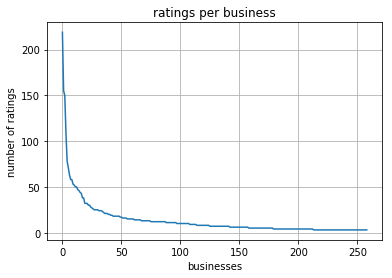

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# Groepeer per movieId
groups = Review.groupby("business_id")

# Pak enkel de ratings
ratings = groups["stars"]

# Bereken hoeveel ratings er zijn
ratings = ratings.apply(len)

# Maak een figuur aan met daarin 3 subplots
fig, (ax1) = plt.subplots(ncols=1)

# Geef meer ruimte tussen de subplots
# fig.subplots_adjust(right=2)

# Plot ratings per film op volgorde van aantal ratings
ax1.plot(list(ratings.sort_values(ascending=False)))
ax1.grid(True)
ax1.set_xlabel("businesses")
ax1.set_ylabel("number of ratings")
ax1.set_title("ratings per business")

fig.show()

In [18]:
review_df = pd.DataFrame(Review_training[["business_id", "stars", "user_id"]])
review_df.head()

,business_id,stars,user_id
0,PNzir9TtJAD7U41GwR98-w,5,DAIpUGIsY71noX0wNuc27w
1,PNzir9TtJAD7U41GwR98-w,1,oDexYEBOZEPBGJ5_e48lZw
2,TL-D_z9E1eKJQqSioemFfw,5,yTZC-agO3gknzsL1A7LOIQ
4,S9BSFX03TBqAHFF1M4c08g,5,HX4IwDr-uvlXVE21lXbrjg
5,PNzir9TtJAD7U41GwR98-w,5,DYJdxkfsqe2mSYFdKAIkBA


In [19]:
# Create utility matrix from review data
utility_review = pd.DataFrame(review_df.pivot_table(index='business_id', columns='user_id', values='stars').fillna(np.nan),
                              columns=review_df["user_id"].drop_duplicates(), index=review_df["business_id"].drop_duplicates(), dtype=float)

display(utility_review.head())

user_id,DAIpUGIsY71noX0wNuc27w,oDexYEBOZEPBGJ5_e48lZw,yTZC-agO3gknzsL1A7LOIQ,HX4IwDr-uvlXVE21lXbrjg,DYJdxkfsqe2mSYFdKAIkBA,liWnObQxCckRGAyFbaI7oQ,gKX5BAYV81HOtBqBvhuQvg,6xGTlUEbAe0ZgEP7T11r2Q,x-rMRSFlYHr_zTa3ah4MoA,ZaFKPCunUIZxGLAbYEu_Eg,...,jf0COB6-HRFUha8SzhMcRA,Z8WqfU6Nvkv1fDuIxcj6Yw,Us5rN-zIUOWuzJWO3xFeLQ,qKQhUmKe3TiLusnwO7n7fg,IypDayXevCUYWuQlFs7oTw,J598rvixWMruEsDLXTpWuA,OFEBf2lZ9g2p9tBB2Tn8jA,ZqLBHbv8zhQ_s_tM3-90VQ,E4OS_8-0BpKQ4PSGToaPbQ,i_UD83Tc8Y681Jd2FsFwZA
business_id,,,,,,,,,,,,,,,,,,,,,
PNzir9TtJAD7U41GwR98-w,5.0,1.0,NaN,NaN,5.0,4.0,5.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TL-D_z9E1eKJQqSioemFfw,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S9BSFX03TBqAHFF1M4c08g,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rIhu4bA2CmSicOSJmTpGug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JaTMTpzALqsL2lesFRrQkw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
def predict_ratings(similarity, utility, to_predict):
    """Predicts the predicted rating for the input test data.
    
    Arguments:
    similarity -- a dataFrame that describes the similarity between items
    utility    -- a dataFrame that contains a rating for each user (columns) and each movie (rows). 
                  If a user did not rate an item the value np.nan is assumed. 
    to_predict -- A dataFrame containing at least the columns movieId and userId for which to do the predictions
    """
    # copy input (don't overwrite)
    ratings_test_c = to_predict.copy()
    # apply prediction to each row
    ratings_test_c["predicted rating"] = to_predict.apply(lambda row: predict_ids(similarity, utility, row["user_id"], row["business_id"]), axis= 1)
    return ratings_test_c

### Helper functions for predict_ratings_item_based ###

def predict_ids(similarity, utility, userId, itemId):
    # select right series from matrices and compute
    if userId in utility.columns and itemId in similarity.index:
        return predict_vectors(utility.loc[:,userId], similarity[itemId])
    return np.nan
def predict_vectors(user_ratings, similarities):
    # select only movies actually rated by user
    relevant_ratings = user_ratings.dropna()
    
    # select corresponding similairties
    similarities_s = similarities[relevant_ratings.index]
    
    # select neighborhood
    similarities_s = similarities_s[similarities_s > 0.0]
    relevant_ratings = relevant_ratings[similarities_s.index]
    
    # if there's nothing left return a prediction of 0
    norm = similarities_s.sum()
    if(norm == 0):
        return np.nan
    
    # compute a weighted average (i.e. neighborhood is all) 
    return np.dot(relevant_ratings, similarities_s)/norm


prediction = predict_ratings(df_similarity_Business, utility_review, Review_test[["business_id", "stars", "user_id"]]).dropna()

prediction

,business_id,stars,user_id,predicted rating
43,Q1itFc-ptu1hGIAMWU0qBw,4,dekONkeOU3o2qxoPl4c8jg,4.000000
171,8EIZAb0knT2u_z2gIxllXw,3,9xy_PF8zdTCYs07MGIQbaA,5.000000
399,uMvfhT3plydwp5f28wk7YA,4,AY_cjY1bRAD-I_K11dYvOA,4.000000
548,PNzir9TtJAD7U41GwR98-w,5,lpgjORUHhRVEcvPIae0pBg,1.000000
781,FP1W3vmQDg9vk3IeWdSccA,3,AY_cjY1bRAD-I_K11dYvOA,4.000000
809,YoaUq0X4KlAmT7kQXhfgfw,1,vJyuRaaQ-1AIuxFtmmnYlw,1.000000
866,6LkGQwlEJNwF7TLfGqQbqw,1,OiuCHsIpzo9S1FJjYSe2qw,2.000000
886,gNIOrQOIlrbw1GW3rwJLUA,5,vWUliOTeW-1ZGnsVi-5obg,5.000000
907,HccL2MM1OjeVCyFoPIf3lw,5,hrkhVb0_Q4L51UyTN-N4Fw,5.000000
963,vZcdi-53UoevFrWDCRXZAw,2,695LXOQoQNx81rBpOQusSg,2.000000


In [21]:
def mse(predicted_ratings):
    """Computes the mean square error between actual ratings and predicted ratings
    
    Arguments:
    predicted_ratings -- a dataFrame containing the columns rating and predicted rating
    """
    diff = predicted_ratings['stars'] - predicted_ratings['predicted rating']
    return (diff**2).mean()

mse(prediction)

1.588362573099415

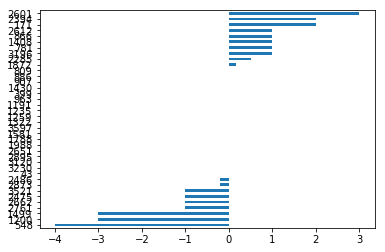

In [22]:
pd.Series(prediction['predicted rating'] - prediction['stars']).sort_values().plot(kind="barh")

### Preprocessing Tip ###
Er wordt hier de data opgeschoond van tip voor Westlake en sun city

In [23]:
# Review data sun city
sun_city_Tip = pd.read_json("data/sun city/tip.json", lines=True)

In [24]:
# User data westlake
westlake_Tip = pd.read_json("data/westlake/tip.json", lines=True)

In [25]:
# User data sun city merged with westlake
total_Tip = sun_city_Tip.append(westlake_Tip, ignore_index=True)
total_Tip.head()

,business_id,compliment_count,date,text,user_id
0,Pydv8bKHerfw8EYQf134Sw,0,2014-03-18 23:14:19,"Great location, it closes early though",75F5X2UH3imcfrgFR-9toA
1,-HbTh_spJOeyEbdj4geK2Q,0,2014-03-14 18:40:10,Sure it's busy around lunch time and the parki...,E_epad6UlUKXtm-X0us1Kg
2,NcgN_lnQ4vgZAllc_1Ro2g,0,2014-06-07 02:30:25,Great food great service home style food love ...,deryjTlc54AWh4fPTnU5ig
3,PNzir9TtJAD7U41GwR98-w,0,2015-06-18 19:16:58,#66 is delicious with chicken. Big enough serv...,PP7mV3SKVhtkuhwUDHUJXQ
4,gRsMPQ8T44cEg2jnvS3omg,0,2014-09-27 21:33:43,Friendly service and yummy food.,qIHnMAq6nhSrLo5tdW_70w


### Preprocessing Checkin ###
Er wordt hier de data opgeschoond van checkin voor Westlake en sun city

In [26]:
# Review data sun city
sun_city_Checkin = pd.read_json("data/sun city/checkin.json", lines=True)

In [27]:
# User data westlake
westlake_Checkin = pd.read_json("data/westlake/checkin.json", lines=True)

In [28]:
# User data sun city merged with westlake
total_Checkin = sun_city_Checkin.append(westlake_Checkin, ignore_index=True)
total_Checkin.head()

,business_id,date
0,-HbTh_spJOeyEbdj4geK2Q,"2010-11-26 03:24:12, 2010-12-25 08:57:38, 2011..."
1,-MRv4Q6MaA2w2rCJbrct_g,"2011-12-10 17:19:18, 2012-03-10 18:23:27, 2012..."
2,-WOgxfwCEkt-6SVcSjdU0w,"2013-02-25 23:02:55, 2014-07-12 23:09:36, 2014..."
3,-XLjdLpTLJ672EMN5Dfrhg,"2015-06-26 19:46:44, 2015-11-18 17:36:30, 2015..."
4,-yL5oGeXMwUaq4ysDwF3Lw,"2010-07-05 18:22:18, 2010-09-30 13:32:23, 2010..."
